# Highlight specific strengths and weaknesses with creative labels or insights.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def analyze_student_persona(user_df, question_df, id_column_name='id'):
   
    try:
        user_df[id_column_name] = pd.to_numeric(user_df[id_column_name], errors='coerce')
    except KeyError:
        return f"Error: Column '{id_column_name}' not found."
    except Exception as e:
        return f"Error converting '{id_column_name}' to numeric: {e}"

    try:
        user_df['submitted_at'] = pd.to_datetime(user_df['submitted_at'])
        user_df['quiz_created_at'] = pd.to_datetime(user_df['quiz_created_at'])
        user_df['time_taken'] = (user_df['submitted_at'] - user_df['quiz_created_at']).dt.total_seconds()

        if user_df['accuracy'].dtype == object:
            user_df['accuracy'] = user_df['accuracy'].str.replace('%', '', regex=False).astype(float) / 100
        elif pd.api.types.is_numeric_dtype(user_df['accuracy']):
            user_df['accuracy'] = pd.to_numeric(user_df['accuracy'], errors='coerce')

        user_df.dropna(subset=['accuracy'], inplace=True)
        if user_df.empty:
            return "No valid accuracy data found."

         # 1. Overall Performance Distribution
        plt.figure(figsize=(8, 6))
        sns.histplot(user_df['accuracy'], kde=True)
        plt.title('Distribution of Student Accuracy')
        plt.xlabel('Accuracy')
        plt.ylabel('Frequency')
        plt.show()

        # 2. Performance by Topic
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='quiz_topic', y='accuracy', data=user_df)
        plt.title('Performance by Quiz Topic')
        plt.xlabel('Quiz Topic')
        plt.ylabel('Accuracy')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
        plt.tight_layout()
        plt.show()

        # 3. Time Taken vs. Accuracy (Scatter Plot)
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='time_taken', y='accuracy', data=user_df)
        plt.title('Time Taken vs. Accuracy')
        plt.xlabel('Time Taken (seconds)')
        plt.ylabel('Accuracy')
        plt.show()

        # 4. Difficulty Level Analysis
        plt.figure(figsize=(8, 6))
        sns.countplot(x='quiz_difficulty_level', hue=pd.cut(user_df['accuracy'], bins=[0, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High']), data=user_df)
        plt.title('Number of Attempts by Difficulty and Accuracy Level')
        plt.xlabel('Difficulty Level')
        plt.ylabel('Number of Attempts')
        plt.show()

        # 5. Weakest/Strongest Topics
        # 5. Weakest/Strongest Topics (with creative labels)
        topic_performance = user_df.groupby('quiz_topic')['accuracy'].mean()
        weakest_topics = topic_performance.sort_values().head(3)
        strongest_topics = topic_performance.sort_values(ascending=False).head(3)

        print("\nAreas for Growth (Needs Improvement):")  # Creative label for weaknesses
        if not weakest_topics.empty:
            for topic, accuracy in weakest_topics.items():
                print(f"- {topic}: {accuracy:.2%} (Potential for Mastery)")  # Creative insight
        else:
            print("No specific areas for growth identified.")

        print("\nAreas of Expertise (Demonstrates Strong Understanding):")  # Creative label for strengths
        if not strongest_topics.empty:
            for topic, accuracy in strongest_topics.items():
                print(f"- {topic}: {accuracy:.2%} (Subject Matter Expert)")  # Creative insight
        else:
            print("No specific areas of expertise identified.")

        # 6. Overall Performance Level (with creative labels)
        average_accuracy = user_df['accuracy'].mean()
        print("\nOverall Performance Level:")  # Creative label
        if average_accuracy < 0.4:
            performance_level = "Novice Explorer (Needs significant improvement)"  # Creative label
        elif average_accuracy < 0.6:
            performance_level = "Emerging Learner (Building foundational skills)"  # Creative label
        elif average_accuracy < 0.8:
            performance_level = "Proficient Practitioner (Demonstrates good understanding)"  # Creative label
        else:
            performance_level = "Master Strategist (Exhibits mastery and deep understanding)"  # Creative label
        print(f"{performance_level}")

        #7 Time analysis with creative label
        user_df['hour_of_day'] = user_df['submitted_at'].dt.hour
        plt.figure(figsize=(10, 6))
        sns.countplot(x='hour_of_day', data=user_df)
        plt.title('Quiz Submission Hour of Day')
        plt.xlabel('Hour of Day (24-hour format)')
        plt.ylabel('Number of Submissions')
        plt.show()

        return "Student persona analysis complete."

    except Exception as e:
        return f"Error during analysis: {e}"


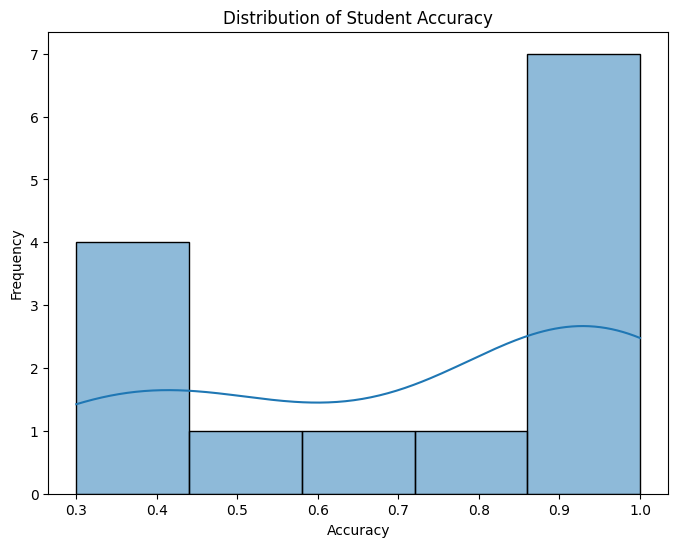

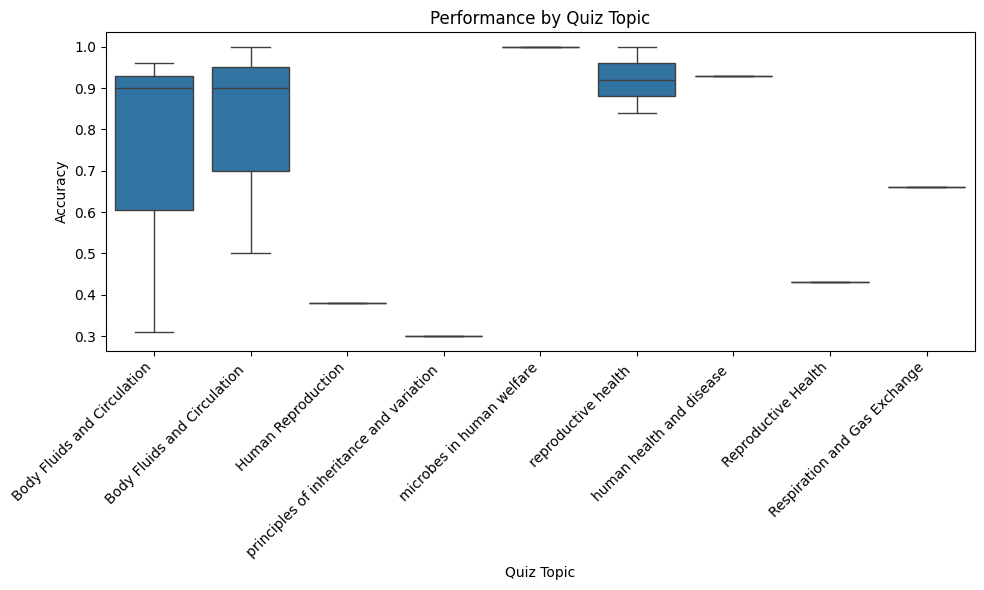

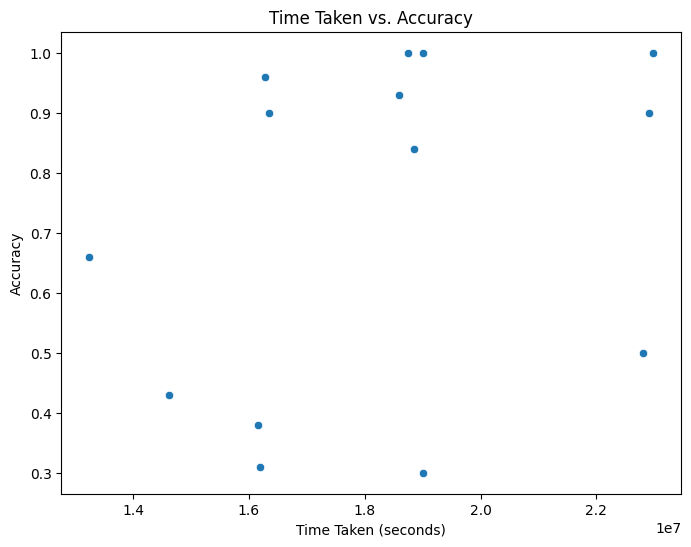

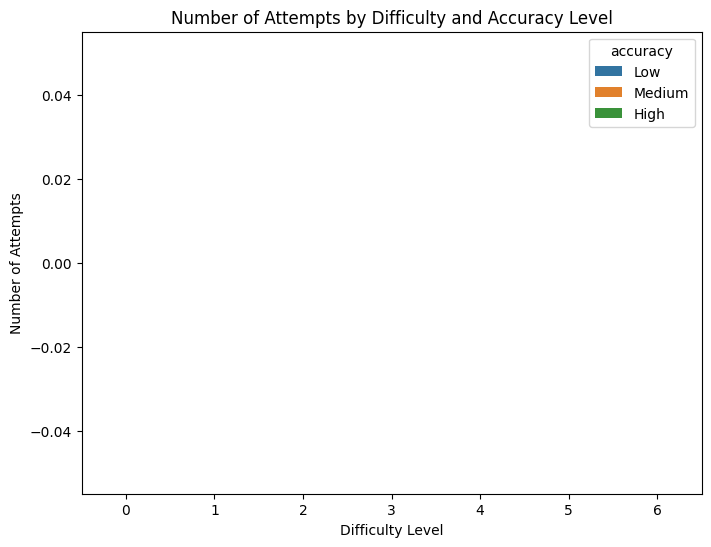


Areas for Growth (Needs Improvement):
- principles of inheritance and variation : 30.00% (Potential for Mastery)
- Human Reproduction: 38.00% (Potential for Mastery)
- Reproductive Health: 43.00% (Potential for Mastery)

Areas of Expertise (Demonstrates Strong Understanding):
- microbes in human welfare: 100.00% (Subject Matter Expert)
- human health and disease : 93.00% (Subject Matter Expert)
- reproductive health : 92.00% (Subject Matter Expert)

Overall Performance Level:
Proficient Practitioner (Demonstrates good understanding)


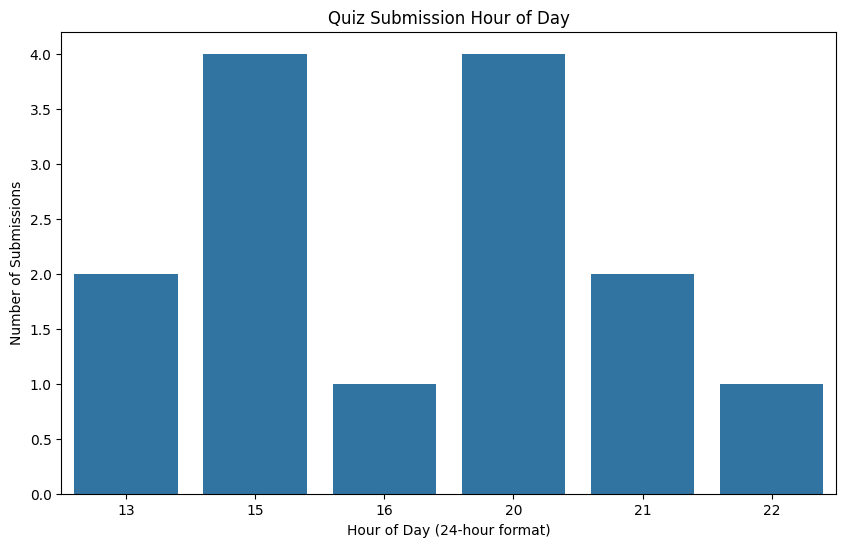

Student persona analysis complete.


In [5]:
def main():
    try:
        user_df = pd.read_csv('api_Endpoin.csv')
        question_df = pd.read_csv('quiz_endpoint.csv')
        id_column_name = 'id'

        insights = analyze_student_persona(user_df, question_df, id_column_name)
        print(insights)

    except FileNotFoundError as e:
        print(f"Error: File not found: {e.filename}")
    except pd.errors.EmptyDataError as e:
        print(f"Error: Empty data in file: {e}")
    except pd.errors.ParserError as e:
        print(f"Error parsing file: {e}")
    except Exception as e:
        print(f"An unexpected error occurred during file processing: {e}")

if __name__ == "__main__":
    main()